<a href="https://colab.research.google.com/github/yhw991228/damentor_3/blob/main/predict_traffic_cmp_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
import warnings

warnings.filterwarnings(action='ignore') 

In [3]:
import os
import datetime
import matplotlib as mpl
import IPython
import IPython.display

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [4]:
import tensorflow as tf

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
traffic_data_2015_01=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2015_01분기.csv',encoding='cp949')
traffic_data_2015_02=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2015_02분기.csv',encoding='cp949')
traffic_data_2015_03=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2015_03분기.csv',encoding='cp949')
traffic_data_2015_04=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2015_04분기.csv',encoding='cp949')
traffic_data_2016_01=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2016_01분기.csv',encoding='cp949')
traffic_data_2016_02=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2016_02분기.csv',encoding='cp949')
traffic_data_2016_03=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2016_03분기.csv',encoding='cp949')
traffic_data_2016_04=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2016_04분기.csv',encoding='cp949')
traffic_data_2017_01=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2017_01분기.csv',encoding='cp949')
traffic_data_2017_02=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2017_02분기.csv',encoding='cp949')
traffic_data_2017_03=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2017_03분기.csv',encoding='cp949')
traffic_data_2017_04=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2017_04분기.csv',encoding='cp949')
traffic_data_2018_01=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2018_01분기.csv',encoding='cp949')
traffic_data_2018_02=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2018_02분기.csv',encoding='cp949')
traffic_data_2018_03=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2018_03분기.csv',encoding='cp949')
traffic_data_2018_04=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2018_04분기.csv',encoding='cp949')
traffic_data_2019_01=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2019_01분기.csv',encoding='cp949')
traffic_data_2019_02=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2019_02분기.csv',encoding='cp949')
traffic_data_2019_03=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2019_03분기.csv',encoding='cp949')
traffic_data_2019_04=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2019_04분기.csv',encoding='cp949')
traffic_data_2020_01=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2020_01분기.csv',encoding='cp949')
traffic_data_2020_02=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2020_02분기.csv',encoding='cp949')
traffic_data_2020_03=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2020_03분기.csv',encoding='cp949')
traffic_data_2020_04=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2020_04분기.csv',encoding='cp949')
traffic_data_2021_01=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2021_01분기.csv',encoding='cp949')
traffic_data_2021_02=pd.read_csv('/content/drive/Shareddrives/삼현텍📈/data/traffic_data/2021_02분기.csv',encoding='cp949')

In [14]:
traffic_data_2015=pd.concat([traffic_data_2015_01,traffic_data_2015_02,traffic_data_2015_03,traffic_data_2015_04])
traffic_data_2016=pd.concat([traffic_data_2016_01,traffic_data_2016_02,traffic_data_2016_03,traffic_data_2016_04])
traffic_data_2017=pd.concat([traffic_data_2017_01,traffic_data_2017_02,traffic_data_2017_03,traffic_data_2017_04])
traffic_data_2018=pd.concat([traffic_data_2018_01,traffic_data_2018_02,traffic_data_2018_03,traffic_data_2018_04])
traffic_data_2019=pd.concat([traffic_data_2019_01,traffic_data_2019_02,traffic_data_2019_03,traffic_data_2019_04])
traffic_data_2020=pd.concat([traffic_data_2020_01,traffic_data_2020_02,traffic_data_2020_03,traffic_data_2020_04])
traffic_data_2021=pd.concat([traffic_data_2021_01,traffic_data_2021_02])
traffic_data_past=pd.concat([traffic_data_2015,traffic_data_2016,traffic_data_2017,traffic_data_2018,traffic_data_2019])
traffic_data_future=pd.concat([traffic_data_2020,traffic_data_2021])

In [15]:
traffic_data_past['집계일자']=pd.to_datetime(traffic_data_past['집계일자'],format='%Y%m%d')
traffic_data_past['연도']=traffic_data_past['집계일자'].dt.year
traffic_data_future['집계일자']=pd.to_datetime(traffic_data_future['집계일자'],format='%Y%m%d')
traffic_data_future['연도']=traffic_data_future['집계일자'].dt.year

In [16]:
def change_traffic(traffic_data):
    traffic_data.index=traffic_data.집계일자
    traffic_data=traffic_data.drop('집계일자',axis=1)
    traffic_data=traffic_data[['영업소명','1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량']]
    traffic_data.index=pd.to_datetime(traffic_data.index, format='%Y%m%d')
    traffic_data['year']=traffic_data.index.year 
    traffic_data['month']=traffic_data.index.month
    days={0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}
    traffic_data['day_of_week']=traffic_data.index.dayofweek 
    traffic_data.day_of_week=traffic_data.day_of_week.apply(lambda x : days[x])
    traffic_data.head()
    return traffic_data

In [17]:
traffic_data_past=change_traffic(traffic_data_past)
traffic_data_past.head()

,영업소명,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,year,month,day_of_week
집계일자,,,,,,,,,,,
2015-01-01,가락,329,14,31,45,467,1,887,2015,1,THU
2015-01-01,가락,696,16,4,2,11,37,766,2015,1,THU
2015-01-01,가락(개),2931,50,91,114,454,316,3956,2015,1,THU
2015-01-01,가락(개),5219,20,24,0,1,283,5547,2015,1,THU
2015-01-01,가락(개),3374,42,107,94,603,415,4635,2015,1,THU


In [18]:
traffic_data_past=traffic_data_past.replace('서서울영업소','서서울')
traffic_data_past=traffic_data_past.replace('서울영업소','서울')
traffic_data_past=traffic_data_past.replace('서대구영업소','서대구')
traffic_data_past=traffic_data_past.replace('북대구영업소','북대구')
traffic_data_past=traffic_data_past.replace('남대구영업소','남대구')
traffic_data_future=traffic_data_future.replace('서서울영업소','서서울')
traffic_data_future=traffic_data_future.replace('서울영업소','서울')
traffic_data_future=traffic_data_future.replace('서대구영업소','서대구')
traffic_data_future=traffic_data_future.replace('북대구영업소','북대구')
traffic_data_future=traffic_data_future.replace('남대구영업소','남대구')

In [19]:
seoul_traffic_data_past=traffic_data_past[((traffic_data_past['영업소명']=='서서울')|(traffic_data_past['영업소명']=='서울')|(traffic_data_past['영업소명']=='남서울'))&(traffic_data_past['day_of_week']=='MON')
]
seoul_traffic_data_past=seoul_traffic_data_past.replace(max(seoul_traffic_data_past['1종교통량']),10000)
seoul_traffic_data_past=seoul_traffic_data_past.replace(max(seoul_traffic_data_past['1종교통량']),10000)
#이상치 2개 수정 **

# LSTM을 돌려 보자

In [20]:
def univariate_data(dataset,start_index,end_index,history_size,target_size):
    data=[]
    labels=[]
    start_index=start_index+history_size
    if end_index is None:
        end_index=len(dataset)-target_size
    for i in range(start_index,end_index):
        indices = range(i-history_size,i)
        data.append(np.reshape(dataset[indices],(history_size,1)))
        labels.append(dataset[i+target_size])
    return np.array(data),np.array(labels)

In [25]:
uni_data=seoul_traffic_data_past['1종교통량']
uni_data.index=seoul_traffic_data_past.index
uni_data.head()

집계일자
2015-01-05    20115
2015-01-05    63332
2015-01-05    17610
2015-01-05    55117
2015-01-05    22979
Name: 1종교통량, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f804a1e8b10>],
      dtype=object)

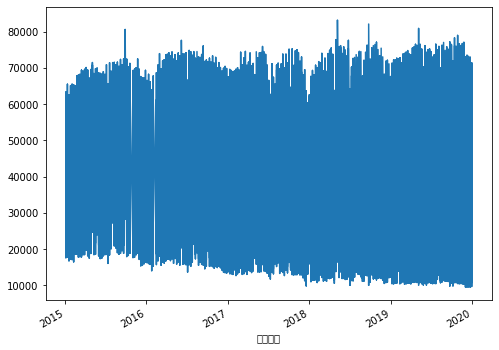

In [26]:
uni_data.plot(subplots=True)

In [27]:
uni_data=uni_data.values
uni_data=(uni_data)/max(uni_data) #정규화

In [28]:
len(uni_data)

2072

In [29]:
TRAIN_SPLIT = 1800 # 10프로 test set
tf.random.set_seed(13)

In [30]:
univariate_past_history = 20
univariate_future_target = 0
x_train_uni,y_train_uni = univariate_data(uni_data , 0, TRAIN_SPLIT,univariate_past_history,univariate_future_target)
x_val_uni,y_val_uni = univariate_data(uni_data , TRAIN_SPLIT,None,univariate_past_history,univariate_future_target)

In [31]:
def create_time_steps(length):
    return list(range(-length,0))

In [32]:
def show_plot(plot_data,delta,title):
    labels=['History','True Future','Model Prediction']
    marker = ['.-','rx','go']
    time_steps=create_time_steps(plot_data[0].shape[0])
    if delta:
        future=delta
    else:
        future =0 
    
    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i],marker[i], markersize=10,label=labels[i])
        else:
            plt.plot(time_steps,plot_data[i].flatten(),marker[i],label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0],(future+5)*2])
    plt.xlabel('Time-Step')
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

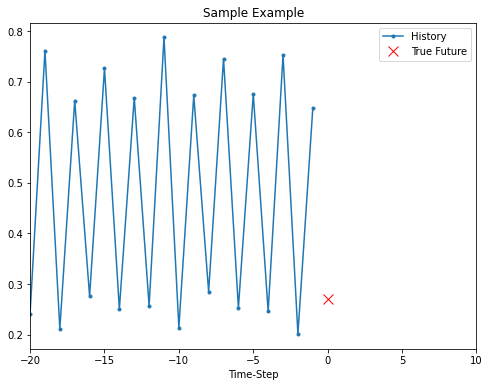

In [33]:
show_plot([x_train_uni[0],y_train_uni[0]],0,'Sample Example') #업다운이 너무 심해서 맞는건지 모르겠다 이렇게 하는건지,,

In [35]:
def baseline(history):
    return np.mean(history)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

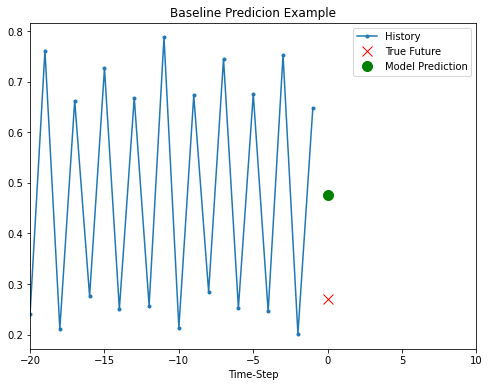

In [36]:
show_plot([x_train_uni[0],y_train_uni[0],baseline(x_train_uni[0])],0,'Baseline Predicion Example')

In [100]:
BATCH_SIZE = 10
BUFFER_SIZE = 10000

train_univariate=tf.data.Dataset.from_tensor_slices((x_train_uni,y_train_uni))
train_univariate=train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni,y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [101]:
simple_lstm_model = tf.keras.models.Sequential([tf.keras.layers.LSTM(8,input_shape=x_train_uni.shape[-2:]),tf.keras.layers.Dense(1)])
simple_lstm_model.compile(optimizer='adam' , loss='mae')

In [102]:
for x, y in val_univariate.take(1):
    print(simple_lstm_model.predict(x).shape)

(10, 1)


In [103]:
EVALUATION_INTERVAL = 10
EPOCHS = 15
simple_lstm_model.fit(train_univariate,epochs=EPOCHS,steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_univariate,validation_steps=50)

Epoch 1/15
10/10 [==============================] - 2s 83ms/step - loss: 0.3794 - val_loss: 0.3744
Epoch 2/15
10/10 [==============================] - 0s 19ms/step - loss: 0.3591 - val_loss: 0.3766
Epoch 3/15
10/10 [==============================] - 0s 19ms/step - loss: 0.3254 - val_loss: 0.3768
Epoch 4/15
10/10 [==============================] - 0s 18ms/step - loss: 0.3300 - val_loss: 0.3757
Epoch 5/15
10/10 [==============================] - 0s 18ms/step - loss: 0.3160 - val_loss: 0.3738
Epoch 6/15
10/10 [==============================] - 0s 18ms/step - loss: 0.3285 - val_loss: 0.3724
Epoch 7/15
10/10 [==============================] - 0s 17ms/step - loss: 0.3041 - val_loss: 0.3701
Epoch 8/15
10/10 [==============================] - 0s 18ms/step - loss: 0.3051 - val_loss: 0.3677
Epoch 9/15
10/10 [==============================] - 0s 18ms/step - loss: 0.2836 - val_loss: 0.3654
Epoch 10/15
10/10 [==============================] - 0s 18ms/step - loss: 0.2860 - val_loss: 0.3632
Epoch 11/

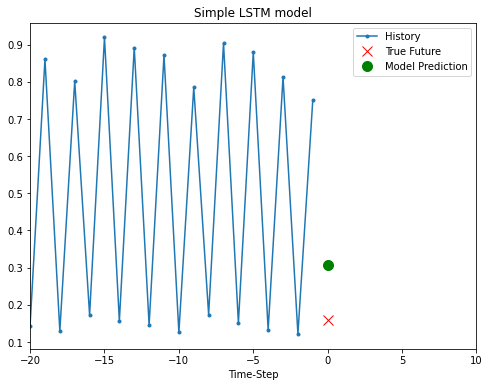

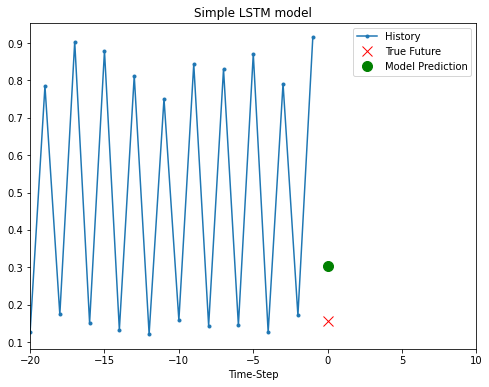

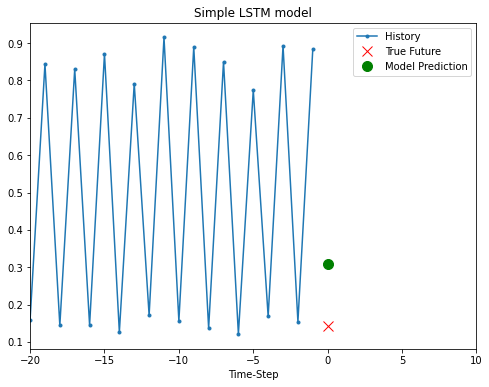

In [105]:
for x,y in val_univariate.take(3):
  plot=show_plot([x[0].numpy(),y[0].numpy(),simple_lstm_model.predict(x)[0]],0,'Simple LSTM model')
  plot.show()